## **MARKET BASKET ANALYSIS**

**GAROFANO ROBERTA 503522**



I am going to implement a Market Basket Analysis (MBA) which has as aim to identify the association rules between the items that appear togheter in various contexts, identify the patterns of the product that are more purchased. I have to analyze the transactions done by the costumers to understand their purchase patterns finding associations between the different products and clients.

In [ ]:
import pandas as pd


!pip install gdown

import gdown

file_id = '1CWYND08LvARdtvbijQdvHJD5nLsyCkMj'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

output = 'online_retail.csv'


gdown.download(url, output, quiet=False)





df = pd.read_csv(output, encoding='ISO-8859-1')

df.head()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From (original): https://drive.google.com/uc?id=1CWYND08LvARdtvbijQdvHJD5nLsyCkMj&export=download
From (redirected): https://drive.google.com/uc?id=1CWYND08LvARdtvbijQdvHJD5nLsyCkMj&export=download&confirm=t&uuid=cc8362d2-5fe4-4031-97cb-e0f9c2d6bd8a
To: /content/online_retail.csv
100%|██████████| 45.6M/45.6M [00:00<00:00, 217MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


InvoiceNo -> Invoice number associated with each transaction. It is a unique identifier for each transaction made.
.

StockCode -> Unique product identification code. This code is assigned to each item sold.


Description -> Textual description of the item purchased.

Quantity -> Quantity of units of each item purchased in a given transaction.

InvoiceDate -> Date and time of the transaction.


UnitPrice -> Unit price of the product, expressed in currency


CustomerID -> Unique identifier of the customer who made the purchase.


Country -> Country where the customer made the purchase

# **EXPLORATIVE ANALYSIS**
Aggregation and summarization of raw data to describe the start process of product portfolio knowledge

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns Description:")
print(df[numeric_columns].describe())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Numeric Columns Description:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


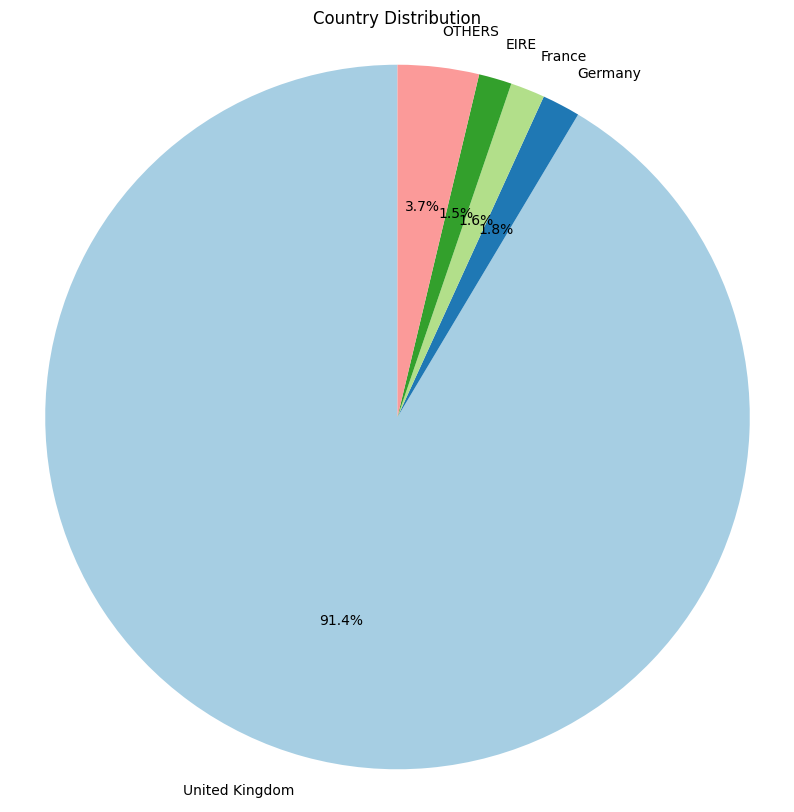

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

status_counts = df['Country'].value_counts()


total_counts = status_counts.sum()
percentages = (status_counts / total_counts) * 100

threshold = 1  # Soglia percentuale
others = percentages[percentages < threshold].sum()
main_countries = percentages[percentages >= threshold]


status_counts_filtered = pd.concat([main_countries, pd.Series([others], index=['OTHERS'])]) # Use pd.concat to concatenate the two series


plt.figure(figsize=(10, 10))
plt.pie(status_counts_filtered, labels=status_counts_filtered.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Country Distribution')
plt.axis('equal')

plt.show()


The main countries of the purchases are: UK, Germany, France and EIRE (the ones with a percentace < than 1 are seen as "others")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-f2d909819258>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)


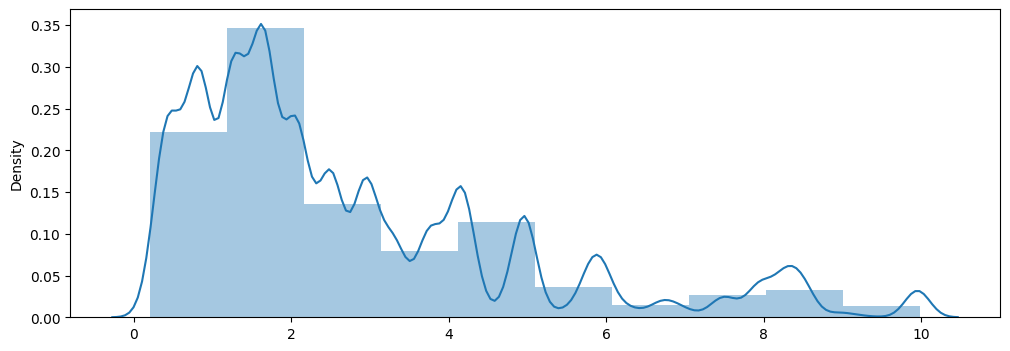

In [ ]:


import seaborn as sns


df_quantile = df[(df['UnitPrice'] > df['UnitPrice'].quantile(0.01)) &
                  (df['UnitPrice'] < df['UnitPrice'].quantile(0.99))]

plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-f76ee78986cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='red') # Changed 'colour' to 'color'


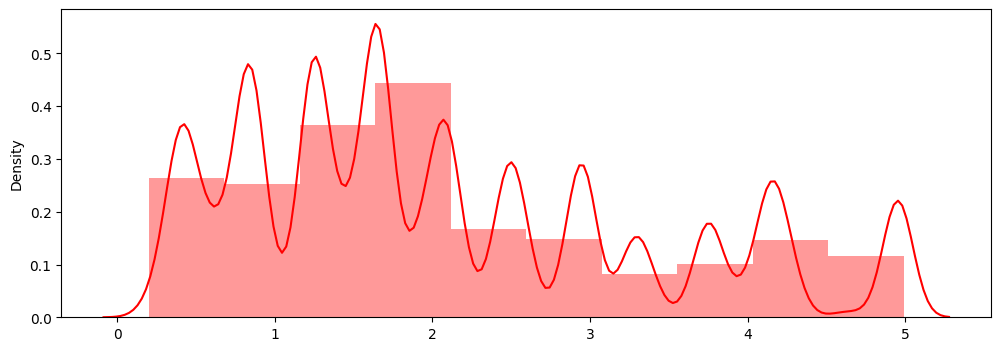

In [ ]:


plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='red') # Changed 'colour' to 'color'
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-b079dcc0f72e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile[df_quantile['UnitPrice'] <=30 ]['UnitPrice'].values, kde=True, bins=10, color='green') # Changed 'colour' to 'color'


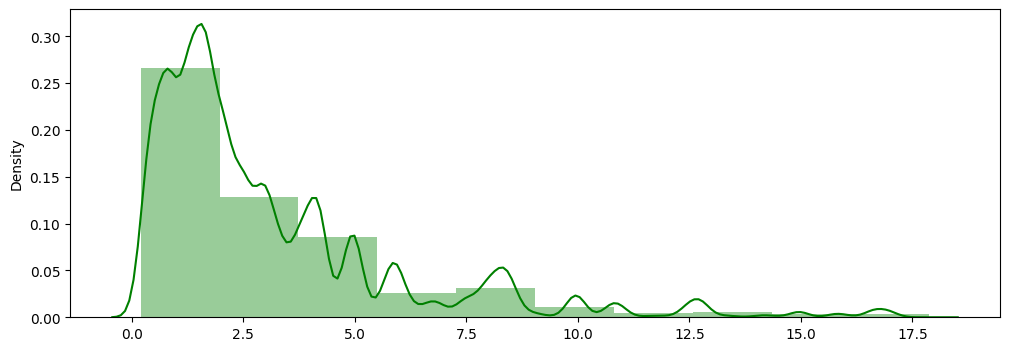

In [ ]:

plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] <=30 ]['UnitPrice'].values, kde=True, bins=10, color='green') # Changed 'colour' to 'color'
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-70-b9c29453a860>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_quantile[df_quantile['UnitPrice'] <=15 ]['UnitPrice'].values, kde=True, bins=10, color='purple')


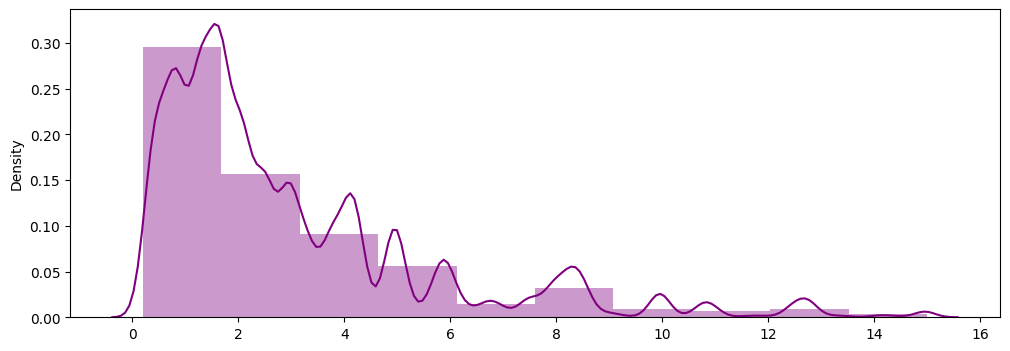

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] <=15 ]['UnitPrice'].values, kde=True, bins=10, color='purple')
plt.show()

From these histograms we can see that most of the products are very low priced, usually under 5. This could indicate that the company sells mostly low-cost products.

In [ ]:
df['Description'].value_counts().head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638


In [ ]:
df.Description.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4223

4223 different articles are considered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-85a4f583257f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = stock_counts.index, y = stock_counts.values, palette = sns.color_palette('GnBu_d'))
<ipython-input-73-85a4f583257f>:4: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = stock_counts.index, y = stock_counts.values, palette = sns.color_palette('GnBu_d'))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '85123A'),
  Text(1, 0, '22423'),
  Text(2, 0, '85099B'),
  Text(3, 0, '47566'),
  Text(4, 0, '20725'),
  Text(5, 0, '84879'),
  Text(6, 0, '22720'),
  Text(7, 0, '22197'),
  Text(8, 0, '21212'),
  Text(9, 0, '20727'),
  Text(10, 0, '22383'),
  Text(11, 0, '22457'),
  Text(12, 0, '23203'),
  Text(13, 0, 'POST'),
  Text(14, 0, '22386')])

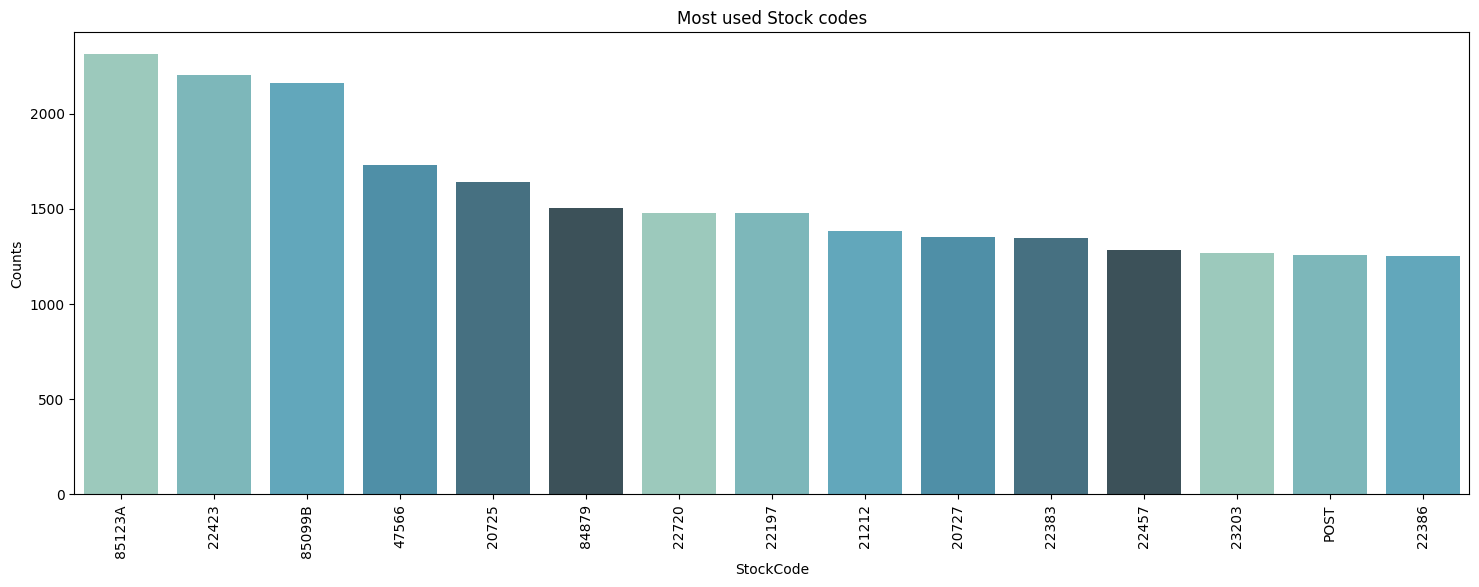

In [ ]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending = False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x = stock_counts.index, y = stock_counts.values, palette = sns.color_palette('GnBu_d'))
plt.ylabel('Counts')
plt.title('Most used Stock codes')
plt.xticks(rotation=90)

In [ ]:
df.CustomerID.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4372

The costumers considered are 4372

In [ ]:


max_buy = pd.DataFrame(df.groupby(['CustomerID'])['UnitPrice'].sum().reset_index())
max_buy = max_buy.sort_values(by='UnitPrice', ascending=False)
max_buy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,UnitPrice
1300,14096.0,41376.33
2027,15098.0,40278.90
1895,14911.0,31060.66
328,12744.0,25108.89
2722,16029.0,24111.14


These are the customers who spent the most, calculating the total amount of their purchases based on unit prices

In [ ]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


min_date = df.InvoiceDate.min()
max_date = df.InvoiceDate.max()

print(f"Minimum date : {min_date}")
print(f"Maximum date: {max_date}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum date : 2010-12-01 08:26:00
Maximum date: 2011-12-09 12:50:00


It is confirmed that the period of time considered is from the 01/12/2010 to the 09/12/2011

# **MBA**

I create a new dataframe in which each row corresponds to a unique product description, and the 'nu_records' column contains the count of transactions for that product description.

In [ ]:
df_agg_items = (
    df
    .groupby('Description')
    .agg(nu_records=('CustomerID', 'count'))
    .reset_index()
    .sort_values(by='nu_records', ascending=False)
)
df_agg_items.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,nu_records
3918,WHITE HANGING HEART T-LIGHT HOLDER,2070
2915,REGENCY CAKESTAND 3 TIER,1905
1866,JUMBO BAG RED RETROSPOT,1662
244,ASSORTED COLOUR BIRD ORNAMENT,1418
2471,PARTY BUNTING,1416


These are the most purchased items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


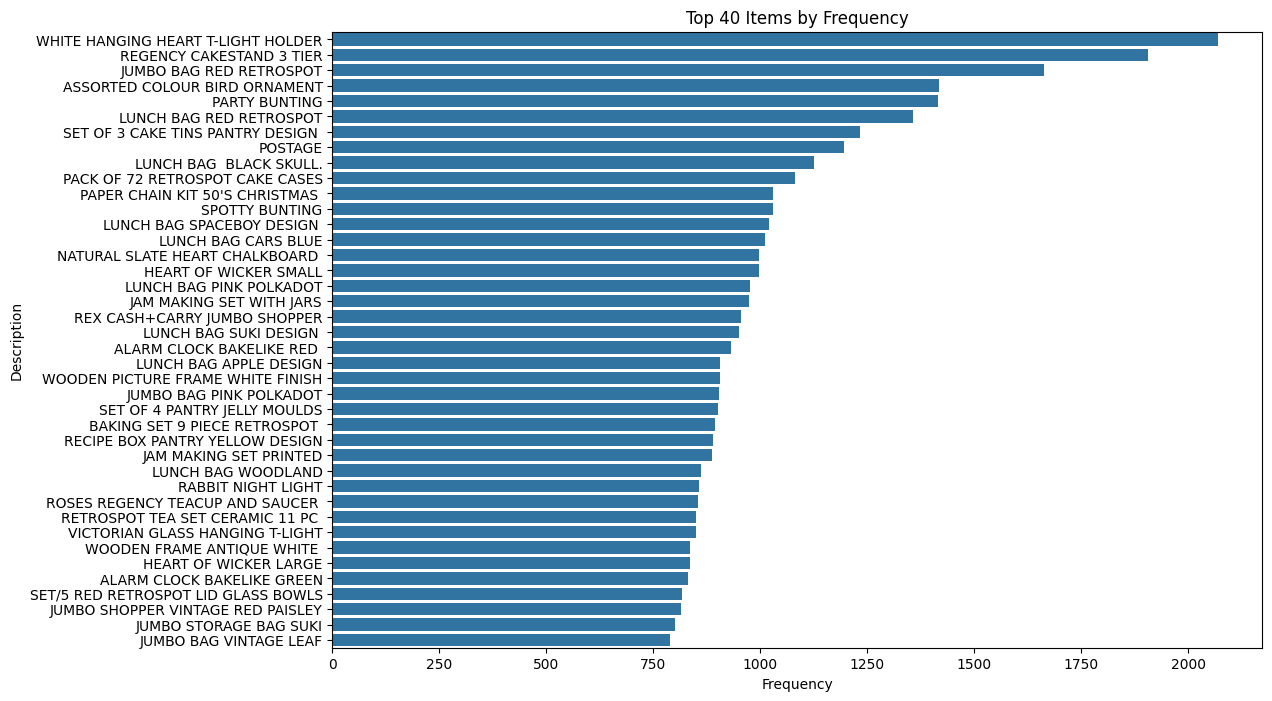

In [ ]:
!pip install seaborn
import seaborn as sns
top_n = 40
top_items = df_agg_items.nlargest(top_n, 'nu_records')

plt.figure(figsize=(12, 8))
sns.barplot(y='Description', x='nu_records', data=top_items)
plt.xlabel('Frequency')
plt.title(f'Top {top_n} Items by Frequency')
plt.show()



In [ ]:
df_agg_items.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,nu_records
906,CRACKED GLAZE NECKLACE BROWN,0
3153,SET 6 CARDS SPARKLY REINDEER 17262,0
963,Crushed,0
977,DAMAGED,0
4222,wrongly sold sets,0


These are the less purchased items

I create e a new datset in which each row corresponds to a unique combination of 'CustomerID' and 'InvoiceDate', and the 'nu_items' column contains the count of items purchased by that customer on that specific invoice date

In [ ]:
df_agg_purchases = (
    df
    .groupby(['CustomerID','InvoiceDate'])
    .agg(nu_items=('Description', 'count'))
    .reset_index()
    .sort_values(by='nu_items', ascending=False)
)

df_agg_purchases.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,InvoiceDate,nu_items
6766,14096.0,2011-11-14 15:27:00,543
6768,14096.0,2011-11-28 15:54:00,534
6769,14096.0,2011-12-05 17:17:00,530
6767,14096.0,2011-11-23 13:39:00,443
6764,14096.0,2011-10-31 14:09:00,436


Now I compute the summary statistics of df_agg_purchases with specific percentiles. This should reveal patterns such as the typical range of items purchased per transaction, identifying outliers or anomalies, and understanding customer behavior based on purchase frequency and quantity.

In [ ]:

df_agg_purchases.describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.90,.95,.99]).T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,min,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max,std
CustomerID,22034.0,15238.928701,12346.0,12417.0,12630.65,12878.0,13425.0,14057.0,14606.0,15140.0,15772.2,16430.1,17068.0,17696.0,17949.0,18225.0,18287.0,1733.518364
InvoiceDate,22034,2011-06-29 14:13:24.485794560,2010-12-01 08:26:00,2010-12-02 15:20:39.600000,2010-12-14 10:12:24,2011-01-14 12:46:42,2011-03-07 11:26:24,2011-04-18 10:29:00,2011-05-27 10:21:48,2011-07-08 09:20:30,2011-08-19 15:23:36,2011-09-26 16:17:48,2011-10-26 12:22:48,2011-11-18 08:56:00,2011-11-29 13:38:03,2011-12-07 13:31:02.400000,2011-12-09 12:50:00,NaN
nu_items,22034.0,18.463692,1.0,1.0,1.0,1.0,2.0,5.0,8.0,12.0,16.0,21.0,29.0,44.0,60.0,105.0,543.0,23.931243


 20% of transactions contain 2 items or less.

 50% of transactions contain 12 items or less.


 80% of transactions contain 29 items or less.


 Only 5% of transactions have more than 60 items.

In [ ]:
df_agg_purchases.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,InvoiceDate,nu_items
9504,14764.0,2011-10-27 10:46:00,1
18852,17440.0,2011-04-06 12:08:00,1
18853,17440.0,2011-04-14 16:54:00,1
18856,17442.0,2010-12-09 15:13:00,1
0,12346.0,2011-01-18 10:01:00,1


Verify in the original dataset whether that specific customer purchase only 1 item that day:

In [ ]:
df.loc[(df.CustomerID ==14764.0 ) &(df.InvoiceDate == '2011-10-27 10:46:00')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
421456,C572968,21314,SMALL GLASS HEART TRINKET POT,-15,2011-10-27 10:46:00,1.85,14764.0,United Kingdom


To implement the Market Basket Analysis model, the dataset needs to be arranged so that each row corresponds to an individual transaction (a combination of customer and purchase date). In this approach, each transaction should have a boolean column for every product, showing whether or not the item was part of that specific purchase.

In [ ]:
df_1 = (
    df
    .groupby(['CustomerID','InvoiceDate'])
    ['Description']
    .apply(list)
    .reset_index()
)
df_1.columns = ['CustomerID','InvoiceDate','Items']
df_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,InvoiceDate,Items
0,12346.0,2011-01-18 10:01:00,[MEDIUM CERAMIC TOP STORAGE JAR]
1,12346.0,2011-01-18 10:17:00,[MEDIUM CERAMIC TOP STORAGE JAR]
2,12347.0,2010-12-07 14:57:00,"[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ..."
3,12347.0,2011-01-26 14:30:00,"[PINK NEW BAROQUECANDLESTICK CANDLE, BLUE NEW ..."
4,12347.0,2011-04-07 10:43:00,"[AIRLINE BAG VINTAGE JET SET WHITE, AIRLINE BA..."


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22034 entries, 0 to 22033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   22034 non-null  float64       
 1   InvoiceDate  22034 non-null  datetime64[ns]
 2   Items        22034 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 516.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The Transaction Encoder is employed to format transaction data so it's compatible with association rule mining algorithms. It transforms a list of lists (where each list represents a transaction and includes the items purchased) into a binary matrix. In this matrix, each row represents a transaction, and each column stands for an item. The matrix uses binary values to show if an item was included (1) or not included (0) in each transaction.

In [ ]:
transaction_encoder = TransactionEncoder()
model = transaction_encoder.fit_transform(df_1['Items'])

transaction_encoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TransactionEncoder()

In [ ]:
df_transactions = pd.DataFrame(model, columns=transaction_encoder.columns_)
df_transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


To perform Market Basket Analysis, the FP-Growth algorithm is applied with a specified minimum support threshold and a defined maximum length for itemsets. The FP-Growth algorithm is particularly effective at uncovering frequent patterns within transaction data by constructing a compact tree structure. Once frequent itemsets are identified, association rules can be derived from these patterns. Several important metrics are involved in this process:

- **Support**: This metric reflects how often an itemset appears in the dataset, calculated as the percentage of transactions that contain that particular itemset.
- **Confidence**: This measures the likelihood of item X appearing in a transaction, given that item Y is already present, represented as P(X|Y).
- **Lift**: Lift assesses the strength of the association between the items on the left-hand side of the rule and those on the right-hand side. A lift value greater than 1 indicates a strong positive association between the items.
- **Maximum length of the itemset**: For computational efficiency, a maximum itemset length of 4 is selected, which helps limit the complexity of the frequent pattern mining while still capturing meaningful associations.

By setting these parameters, FP-Growth can efficiently process large datasets, revealing significant patterns that would otherwise be difficult to detect with simpler algorithms.

In [ ]:
MIN_SUPPORT_FPGROWTH = 0.001
MAX_LEN_FPGROWTH = 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
df_fpgrowth_frequent_pattern = fpgrowth(df_transactions, min_support=MIN_SUPPORT_FPGROWTH, max_len=MAX_LEN_FPGROWTH, use_colnames=True)
# add a new column itemset_length
df_fpgrowth_frequent_pattern['itemset_length'] = df_fpgrowth_frequent_pattern['itemsets'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's understand what are the most frequent itemsets

In [ ]:
df_fpgrowth_frequent_pattern.loc[df_fpgrowth_frequent_pattern.itemset_length > 1].sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_length
10288,0.025279,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
79886,0.025098,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
2544,0.024371,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
24126,0.023963,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
67430,0.023691,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",2
103516,0.021512,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",2
10465,0.021376,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",2
55139,0.021240,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG RED RET...",2
24135,0.021149,"(LUNCH BAG PINK POLKADOT, LUNCH BAG BLACK SKU...",2
94285,0.021149,"(GARDENERS KNEELING PAD KEEP CALM , GARDENERS ...",2


Now, I want to discover new associative rules

In [ ]:
ASSOCIATION_RULES_METRIC = "lift"
ASSOCIATION_RULES_MIN_TRESHOLD = 1
df_rules_fpgrowth = association_rules(df_fpgrowth_frequent_pattern, metric=ASSOCIATION_RULES_METRIC, min_threshold=ASSOCIATION_RULES_MIN_TRESHOLD)
df_rules_fpgrowth.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LARGE CERAMIC TOP STORAGE JAR),(MEDIUM CERAMIC TOP STORAGE JAR),0.010801,0.009304,0.005537,0.512605,55.096290,0.005436,2.032635,0.992571
1,(MEDIUM CERAMIC TOP STORAGE JAR),(LARGE CERAMIC TOP STORAGE JAR),0.009304,0.010801,0.005537,0.595122,55.096290,0.005436,2.443201,0.991071
2,(MEDIUM CERAMIC TOP STORAGE JAR),(SPOTTY BUNTING),0.009304,0.046065,0.001861,0.200000,4.341675,0.001432,1.192419,0.776902
3,(SPOTTY BUNTING),(MEDIUM CERAMIC TOP STORAGE JAR),0.046065,0.009304,0.001861,0.040394,4.341675,0.001432,1.032399,0.806841
4,(JAM MAKING SET WITH JARS),(MEDIUM CERAMIC TOP STORAGE JAR),0.043796,0.009304,0.001725,0.039378,4.232488,0.001317,1.031307,0.798713
5,(MEDIUM CERAMIC TOP STORAGE JAR),(JAM MAKING SET WITH JARS),0.009304,0.043796,0.001725,0.185366,4.232488,0.001317,1.173783,0.770905
6,(REGENCY CAKESTAND 3 TIER),(MEDIUM CERAMIC TOP STORAGE JAR),0.085413,0.009304,0.001634,0.019129,2.055996,0.000839,1.010016,0.561585
7,(MEDIUM CERAMIC TOP STORAGE JAR),(REGENCY CAKESTAND 3 TIER),0.009304,0.085413,0.001634,0.175610,2.055996,0.000839,1.109410,0.518441
8,(PACK OF 72 RETROSPOT CAKE CASES),(MEDIUM CERAMIC TOP STORAGE JAR),0.047245,0.009304,0.001225,0.025937,2.787742,0.000786,1.017076,0.673087
9,(MEDIUM CERAMIC TOP STORAGE JAR),(PACK OF 72 RETROSPOT CAKE CASES),0.009304,0.047245,0.001225,0.131707,2.787742,0.000786,1.097274,0.647309


In [ ]:
df_rules_fpgrowth.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


715260

Let's search for rules with a specific product as "antecedent":

In [ ]:
df_rules_fpgrowth[df_rules_fpgrowth["antecedents"].apply(lambda x: 'MEDIUM CERAMIC TOP STORAGE JAR' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
125,(MEDIUM CERAMIC TOP STORAGE JAR),"(LARGE CERAMIC TOP STORAGE JAR, JAM MAKING SET...",0.009304,0.001316,0.001089,0.117073,88.951388,0.001077,1.131106,0.998044
619761,(MEDIUM CERAMIC TOP STORAGE JAR),"(LARGE CERAMIC TOP STORAGE JAR, SMALL CERAMIC ...",0.009304,0.003994,0.003268,0.351220,87.940576,0.003231,1.535197,0.997913
619766,(MEDIUM CERAMIC TOP STORAGE JAR),"(SMALL CERAMIC TOP STORAGE JAR , SPOTTY BUNTING)",0.009304,0.001498,0.001225,0.131707,87.940576,0.001211,1.149961,0.997913
619788,"(SET OF 60 PANTRY DESIGN CAKE CASES , MEDIUM C...",(SMALL CERAMIC TOP STORAGE JAR ),0.001861,0.008441,0.001316,0.707317,83.790454,0.001300,3.387825,0.989907
95,(MEDIUM CERAMIC TOP STORAGE JAR),"(LARGE CERAMIC TOP STORAGE JAR, SET OF 60 PANT...",0.009304,0.001725,0.001316,0.141463,82.026444,0.001300,1.162764,0.997085
...,...,...,...,...,...,...,...,...,...,...
15,(MEDIUM CERAMIC TOP STORAGE JAR),(BAKING SET 9 PIECE RETROSPOT ),0.009304,0.039984,0.001135,0.121951,3.050026,0.000763,1.093352,0.678446
9,(MEDIUM CERAMIC TOP STORAGE JAR),(PACK OF 72 RETROSPOT CAKE CASES),0.009304,0.047245,0.001225,0.131707,2.787742,0.000786,1.097274,0.647309
7,(MEDIUM CERAMIC TOP STORAGE JAR),(REGENCY CAKESTAND 3 TIER),0.009304,0.085413,0.001634,0.175610,2.055996,0.000839,1.109410,0.518441
21,(MEDIUM CERAMIC TOP STORAGE JAR),(PARTY BUNTING),0.009304,0.063493,0.001044,0.112195,1.767053,0.000453,1.054857,0.438163


In [ ]:
df_rules_fpgrowth[df_rules_fpgrowth["antecedents"].apply(lambda x: 'PACK OF 72 RETROSPOT CAKE CASES' in x)].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
613183,"(PACK OF 72 RETROSPOT CAKE CASES, SMALL DOLLY ...","(60 CAKE CASES DOLLY GIRL DESIGN, SMALL MARSHM...",0.002995,0.001180,0.001044,0.348485,295.327506,0.001040,1.533073,0.999608
613184,"(PACK OF 72 RETROSPOT CAKE CASES, SMALL MARSHM...","(60 CAKE CASES DOLLY GIRL DESIGN, SMALL DOLLY ...",0.002224,0.001725,0.001044,0.469388,272.170784,0.001040,1.881365,0.998546
160915,"(PACK OF 72 RETROSPOT CAKE CASES, CHARLOTTE BA...","(60 CAKE CASES DOLLY GIRL DESIGN, WOODLAND CHA...",0.002269,0.001815,0.001089,0.480000,264.408000,0.001085,1.919586,0.998484
612784,"(PACK OF 72 RETROSPOT CAKE CASES, SMALL MARSHM...","(SMALL DOLLY MIX DESIGN ORANGE BOWL, SET OF 60...",0.002224,0.002088,0.001225,0.551020,263.938776,0.001221,2.222623,0.998432
75943,"(PACK OF 72 RETROSPOT CAKE CASES, GARDENERS KN...","(60 CAKE CASES DOLLY GIRL DESIGN, GARDENERS KN...",0.003268,0.001362,0.001089,0.333333,244.822222,0.001085,1.497958,0.999180
...,...,...,...,...,...,...,...,...,...,...
620768,(PACK OF 72 RETROSPOT CAKE CASES),(HOT WATER BOTTLE I AM SO POORLY),0.047245,0.023146,0.001407,0.029779,1.286572,0.000313,1.006837,0.233786
61774,"(PACK OF 72 RETROSPOT CAKE CASES, PACK OF 72 S...",(REGENCY CAKESTAND 3 TIER),0.011255,0.085413,0.001225,0.108871,1.274635,0.000264,1.026323,0.217914
433590,(PACK OF 72 RETROSPOT CAKE CASES),(GREY HEART HOT WATER BOTTLE),0.047245,0.023373,0.001362,0.028818,1.232982,0.000257,1.005607,0.198328
679436,(PACK OF 72 RETROSPOT CAKE CASES),(WOODEN FRAME ANTIQUE WHITE ),0.047245,0.037488,0.002178,0.046110,1.229996,0.000407,1.009039,0.196262


Each row represents an association rule. The association rule has the following form:

Antecedent -> Consequent

In this case, a rule could be:

If someone buys PACK OF 72 RETROSPOT CAKE CASES, there is a strong probability (34.85% confidence) that they will also buy 60 CAKE CASES DOLLY GIRL DESIGN, SMALL MARSHMALLOWS,..)

The rules are derived from the combination of lift (which indicates the strength of the relationship) and confidence (which represents the conditional probability of the combined purchase).